In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')

/var/folders/bd/sqft7pw95xx5vb3vsgj_30tm0000gn/T/ipykernel_21649/602580759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["goldDiff"] = df["blueGoldDiff"]
/var/folders/bd/sqft7pw95xx5vb3vsgj_30tm0000gn/T/ipykernel_21649/602580759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["expDiff"] = df["blueExperienceDiff"]
/var/folders/bd/sqft7pw95xx5vb3vsgj_30tm0000gn/T/ipykernel_21649/602580759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

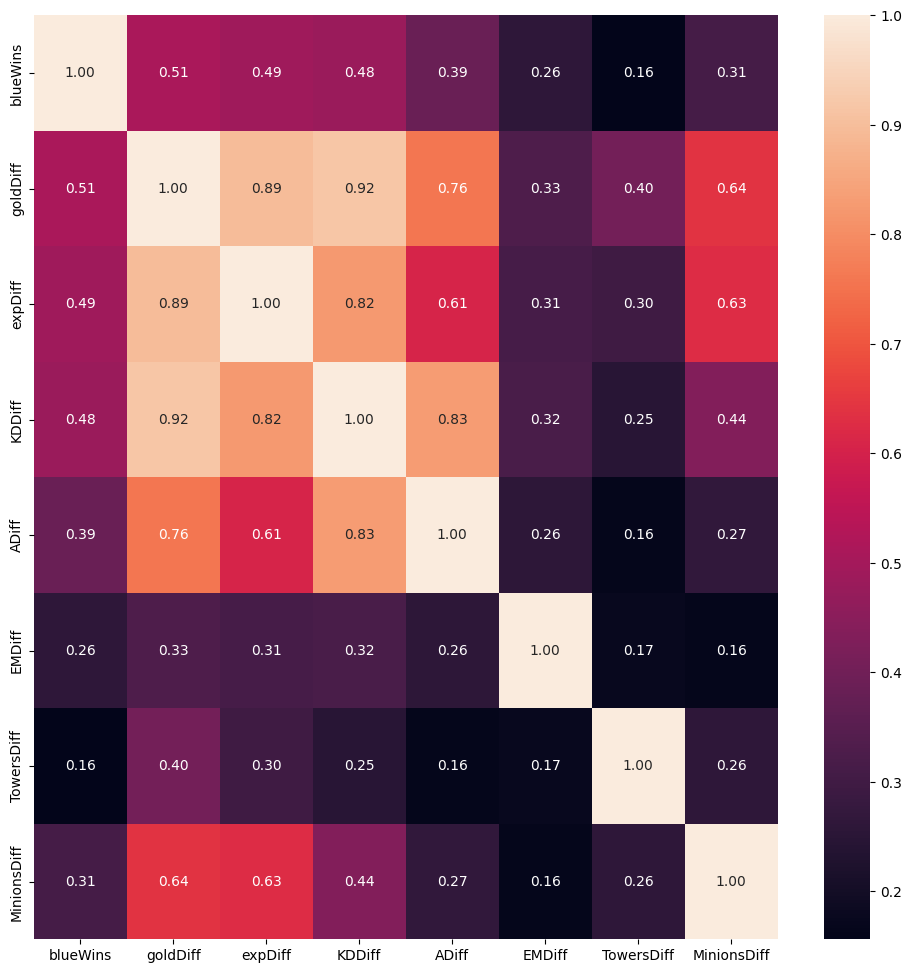

In [3]:
features = df[['blueWins']]

features["goldDiff"] = df["blueGoldDiff"]
features["expDiff"] = df["blueExperienceDiff"]
features["KDDiff"] = df["blueKills"] - df["redKills"]
features["ADiff"] = df["blueAssists"] - df["redAssists"]
features["EMDiff"] = df["blueEliteMonsters"] - df["redEliteMonsters"]
features["TowersDiff"] = df["blueTowersDestroyed"] - df["redTowersDestroyed"]
features["MinionsDiff"] = df["blueTotalMinionsKilled"] - df["redTotalMinionsKilled"]

plt.figure(figsize=(12, 12))
sns.heatmap(features.corr(), annot=True, fmt=".2f")
plt.show()

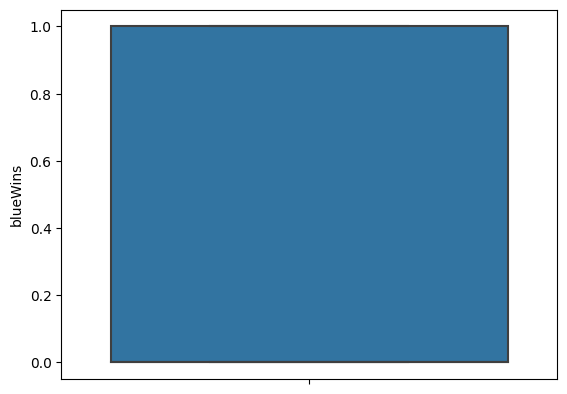

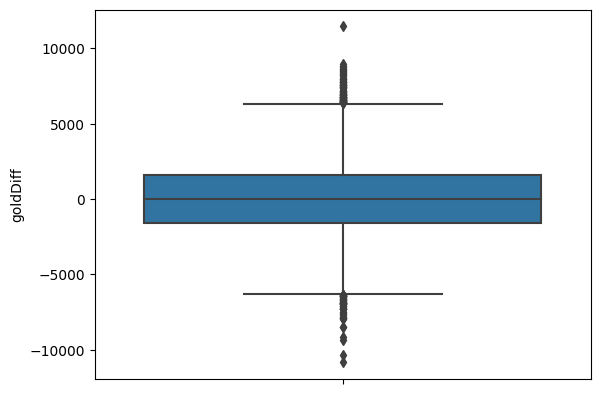

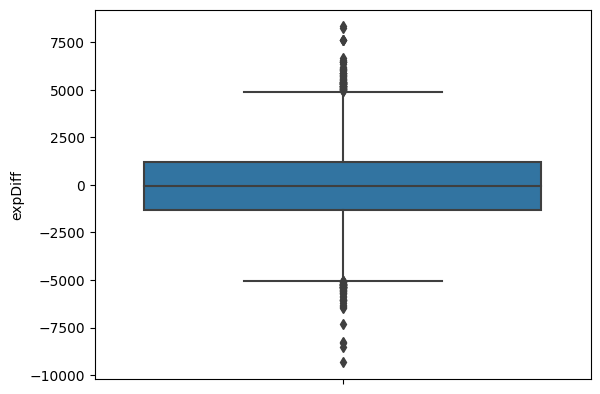

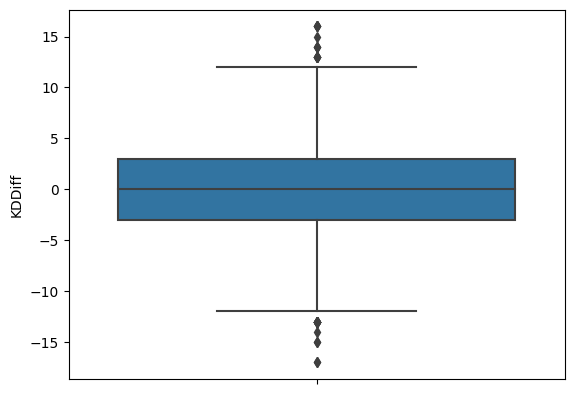

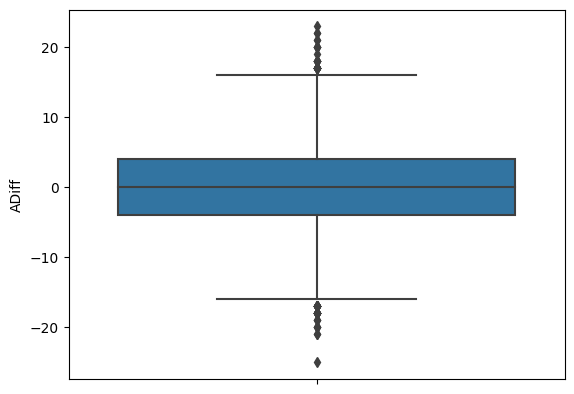

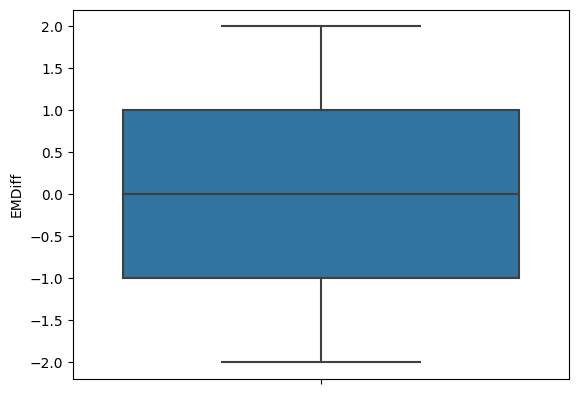

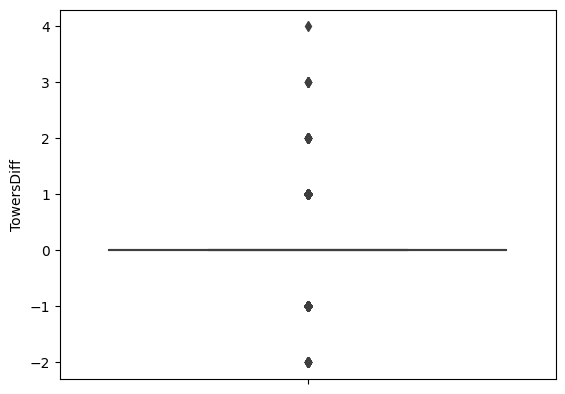

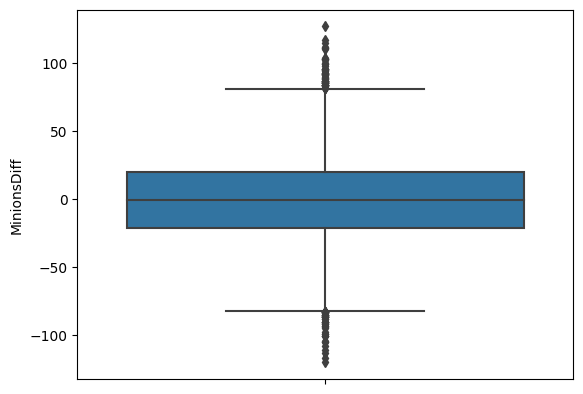

In [4]:
for col in features.columns:
    plt.figure()
    sns.boxplot(data=features, y=col)
    plt.plot()

## TOWERS

In [5]:
features.TowersDiff.value_counts()

TowersDiff
 0    9064
 1     406
-1     347
 2      28
-2      27
 3       6
 4       1
Name: count, dtype: int64

In [42]:
features.TowersDiff.value_counts(normalize=True) * 100

TowersDiff
 0    91.750177
 1     4.109728
-1     3.512501
 2     0.283429
-2     0.273307
 3     0.060735
 4     0.010122
Name: proportion, dtype: float64

In [6]:
features.TowersDiff[(features.TowersDiff == 1) | (features.TowersDiff == -1)].count() / features.TowersDiff.count() * 100

7.622228970543578

In [7]:
features["AbsTowersDiff"] = abs(features.TowersDiff)

/var/folders/bd/sqft7pw95xx5vb3vsgj_30tm0000gn/T/ipykernel_21649/233776726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["AbsTowersDiff"] = abs(features.TowersDiff)


Text(0.5, 1.0, 'Tower advantage on one of the sides')

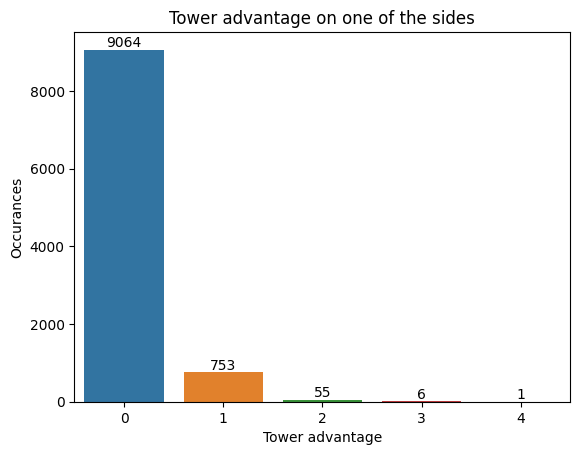

In [8]:
ax = sns.countplot(data=features, x="AbsTowersDiff")
ax.bar_label(ax.containers[0])
ax.set_xlabel("Tower advantage")
ax.set_ylabel("Occurances")
ax.set_title("Tower advantage on one of the sides")

In [9]:
tower_outliers = features[features.AbsTowersDiff > 0]

In [10]:
from sklearn.metrics import accuracy_score
pred = [1 if p > 0 else 0 for p in tower_outliers.TowersDiff.values]

accuracy_score(tower_outliers.blueWins.values, pred)

0.7717791411042945

### Priors for Towers destroyed

In [35]:
import numpy as np

[Text(0, 0, '52'),
 Text(0, 0, '140'),
 Text(0, 0, '314'),
 Text(0, 0, '1556'),
 Text(0, 0, '5916'),
 Text(0, 0, '1487'),
 Text(0, 0, '322'),
 Text(0, 0, '170'),
 Text(0, 0, '43')]

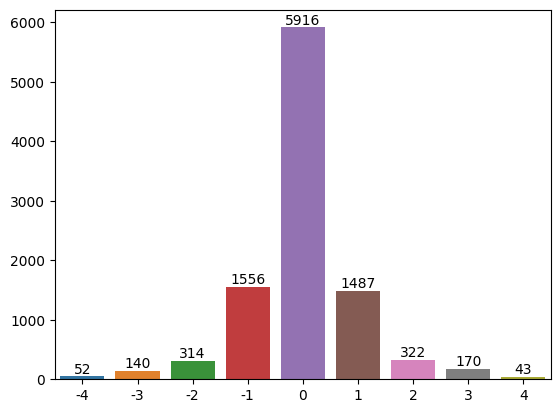

In [94]:
prior_prob = np.array([5, 15, 30, 150, 600, 150, 30, 15, 5]) / 1000
x = list(range(-4, 5))
draws = np.random.multinomial(n=10000, pvals=prior_prob)
ax = sns.barplot(x=x, y=draws)
ax.bar_label(ax.containers[0])

https://mc-stan.org/docs/2_22/functions-reference/categorical-distribution.html

## Kills

[]

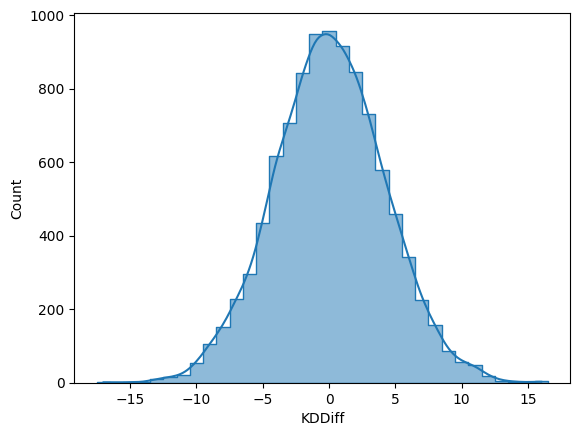

In [28]:
sns.histplot(data=features, x="KDDiff", kde=True, element="step", discrete=True)
plt.plot()

### Priors for Kills 

<Axes: ylabel='Count'>

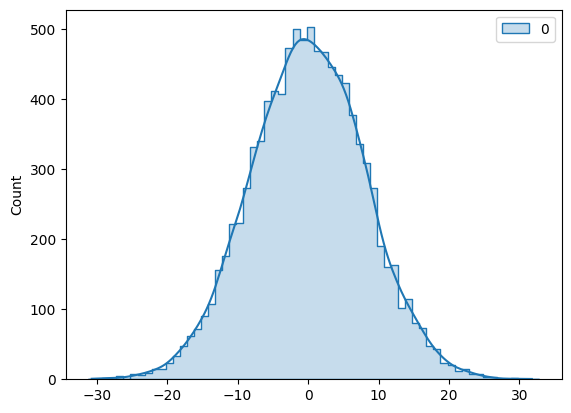

In [96]:
kills = np.random.normal(loc=0, scale=8, size=(10000, 1))
sns.histplot(kills, kde=True, element="step", discrete=True)

## Assists

[]

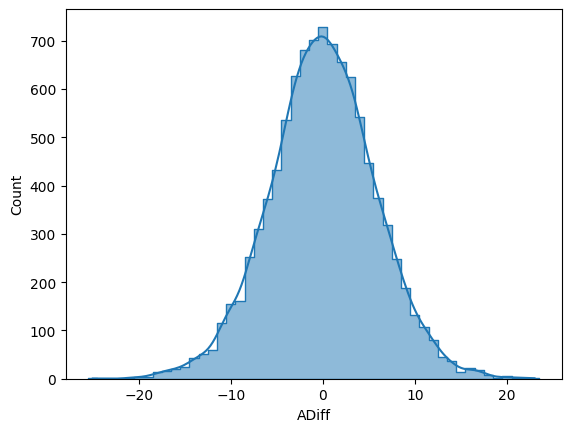

In [31]:
sns.histplot(data=features, x="ADiff", kde=True, element="step", discrete=True)
plt.plot()

<Axes: ylabel='Count'>

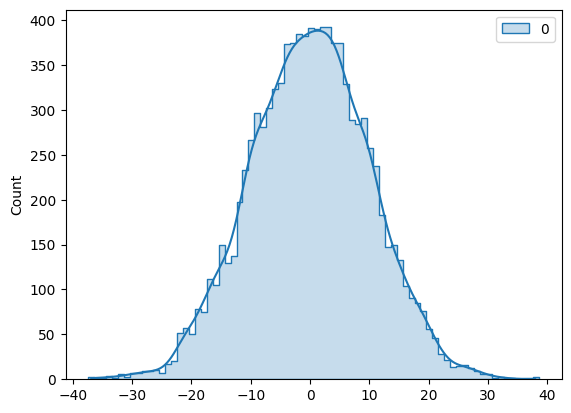

In [97]:
assists = np.random.normal(loc=0, scale=10, size=(10000, 1))
sns.histplot(assists, kde=True, element="step", discrete=True)

## Creep Score

[]

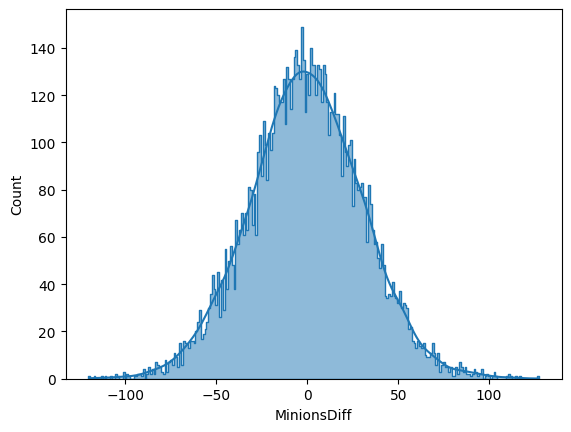

In [32]:
sns.histplot(data=features, x="MinionsDiff", kde=True, element="step", discrete=True)
plt.plot()

<Axes: ylabel='Count'>

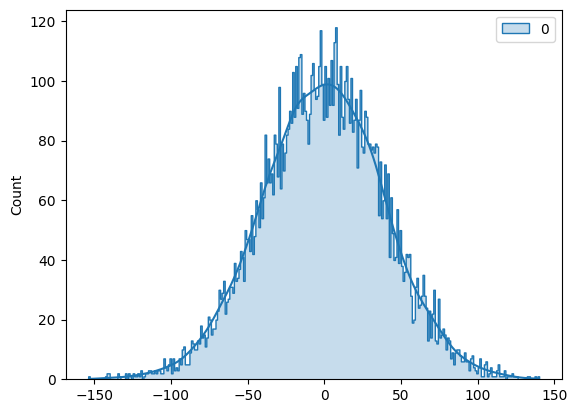

In [100]:
assists = np.random.normal(loc=0, scale=40, size=(10000, 1))
sns.histplot(assists, kde=True, element="step", discrete=True)

## Epic Monsters

Text(0, 0.5, 'Occurances')

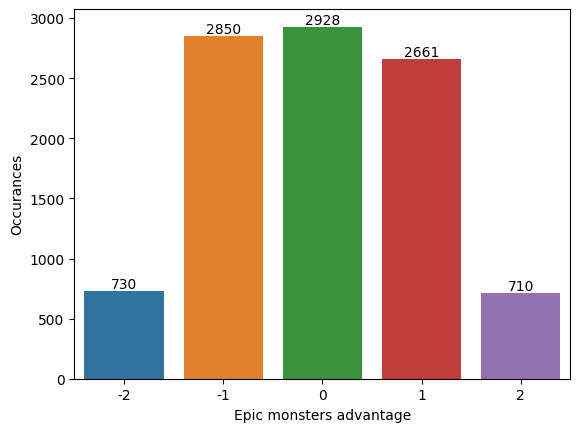

In [101]:
ax = sns.countplot(data=features, x="EMDiff")
ax.bar_label(ax.containers[0])
ax.set_xlabel("Epic monsters advantage")
ax.set_ylabel("Occurances")

In [102]:
features.EMDiff.value_counts(normalize=True)

EMDiff
 0    0.296386
-1    0.288491
 1    0.269359
-2    0.073894
 2    0.071870
Name: proportion, dtype: float64

### Priors

[Text(0, 0, '1078'),
 Text(0, 0, '2581'),
 Text(0, 0, '2655'),
 Text(0, 0, '2646'),
 Text(0, 0, '1040')]

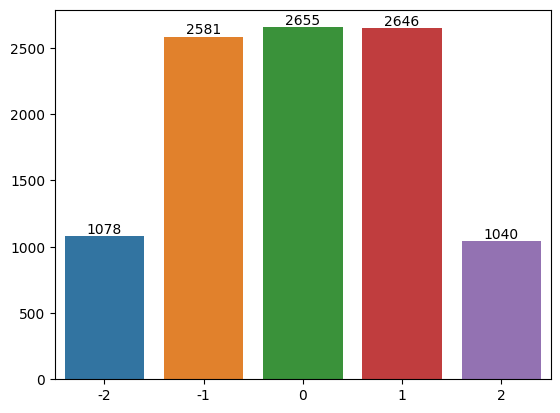

In [105]:
prior_prob = np.array([100, 266, 267, 266, 100]) / 1000
x = list(range(-2, 3))
draws = np.random.multinomial(n=10000, pvals=prior_prob)
ax = sns.barplot(x=x, y=draws)
ax.bar_label(ax.containers[0])

## Gold Diff

[]

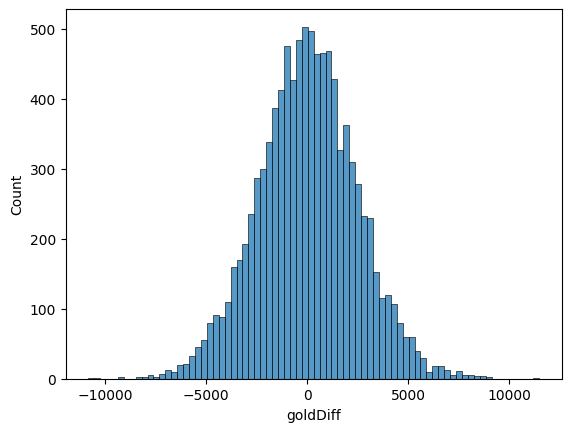

In [107]:
sns.histplot(data=features, x="goldDiff")
plt.plot()

<Axes: ylabel='Count'>

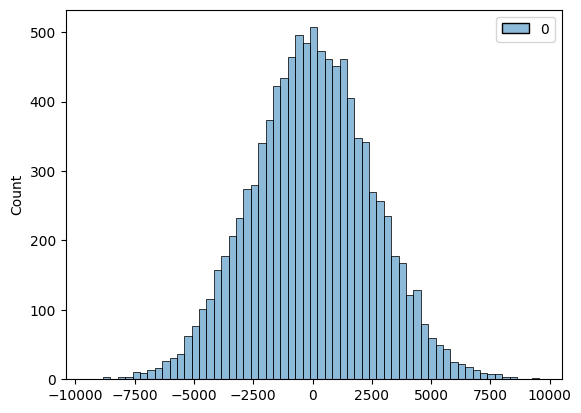

In [110]:
exp = np.random.normal(loc=0, scale=2500, size=(10000, 1))
sns.histplot(exp)

## Exp Diff

[]

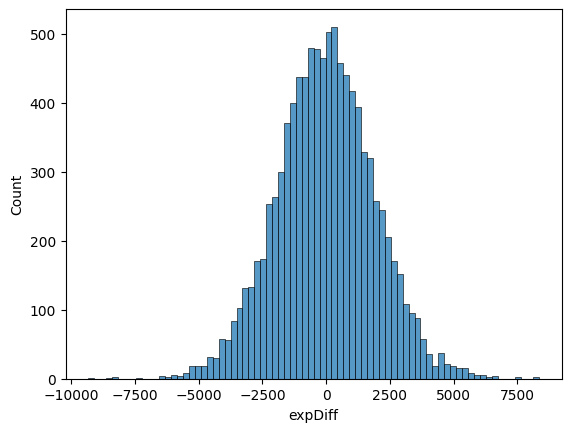

In [108]:
sns.histplot(data=features, x="expDiff")
plt.plot()

<Axes: ylabel='Count'>

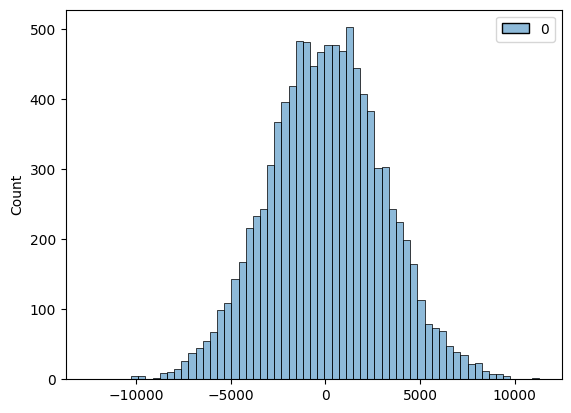

In [109]:
exp = np.random.normal(loc=0, scale=3000, size=(10000, 1))
sns.histplot(exp)